In this lecture, we study issues related to reading and writing files in Python.

To understand how to work with files in Python, we first need to understand the basics related to file manipulation. A file has two key properties: a filename (usually written as one word) and a path. The path specifies the location of a file on the computer. For example, there is a file on my Windows 7 laptop with the filename projects.docx in the
path C:\Users\asweigart\Documents. The part of the filename after the last period is called the file’s extension and tells you a file’s type.

On Windows, paths are written using backslashes (\\) as the separator between folder names. OS X and Linux, however, use the forward slash (/) as their path separator. If you want your programs to work on all operating systems, you will have to write your Python scripts to handle both cases.

Fortunately, this is simple to do with the os.path.join() function. If you pass it the string values of individual file and folder names in your path, os.path.join() will return a string with a file path using the correct path separators.

In [2]:
import os
os.path.join('usr', 'bin', 'spam')

'usr\\bin\\spam'

In [2]:
myFiles = ['accounts.txt', 'details.csv', 'invite.docx']
for filename in myFiles:
    print(os.path.join('C:\\Users\\asweigart', filename))

C:\Users\asweigart\accounts.txt
C:\Users\asweigart\details.csv
C:\Users\asweigart\invite.docx


Every program that runs on your computer has a current working directory, or 'cwd' for short. Any filenames or paths that do not begin with the root folder are assumed to be under the current working directory. You can get the current
working directory as a string value with the os.getcwd() function and change it with os.chdir(). For example, you can type os.chdir('C:\\Windows\\System32') under the Window's system to change your working director to the path  'C:\\Windows\\System32'. Notice that Python will display an error if you try to change to a directory that does not exist.

In [3]:
os.getcwd()

'C:\\Users\\GAO\\Anaconda\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python'

There are two ways to specify a file path: 1) an absolute path, which always begins with the root folder, and 2) a relative path, which is relative to the program’s current working directory. There are also the dot (.) and dot-dot (..) folders. These are not real folders but special names that can be used in a path. A single period/dot for a folder name is shorthand for "this directory". Two periods ("dot-dot") means "the parent folder".

Below is an illustration:

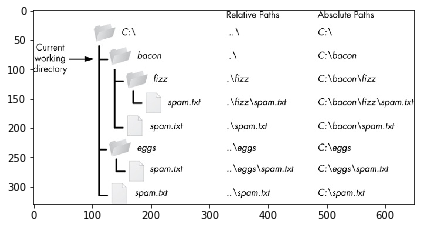

In [4]:
from skimage import io
io.imshow(io.imread("https://automatetheboringstuff.com/images/000032.jpg"))
io.show()

Your programs can create new folders (directories) with the os.makedirs() function. In contrast, os.remove() will remove a file and os.rmdir() will remove an empty directory. Below is an example:

In [5]:
os.makedirs('C:\\delicious\\walnut\\waffles') 

The 'os.path' module contains many helpful functions related to filenames and file paths. For instance, the function  os.path.join(), as shown before, can be used to build paths in a way that will work on any operating system. Since 'os.path' is a module inside the 'os' module, you can import it by simply running "import os". Whenever any programs need to work with files, folders, or file paths, this module comes in handy. The full documentation for this module can be found online at https://docs.python.org/3.4/library/os.path.html. 

The 'os.path' module provides functions for returning the absolute path of a relative path and for checking whether a given path is an absolute path. Calling os.path.abspath(path) will return a string of the absolute path of the argument. This is an easy way to convert a relative path into an absolute one. In contrast, calling os.path.isab(path) will return 'True' if the argument is an absolute path and 'False' if it is a relative path. Lastly, calling os.path.relpath(path, start) will return a string of a relative path from the start path to path. If start is not provided, the current working directory is used as the start path.

In [6]:
print(os.path.abspath('..'))
print(os.path.abspath('.')) # this gives the current working directory
print(os.path.abspath('.\\subfolder_may_not_exist'))

C:\Users\GAO\Anaconda\Scripts
C:\Users\GAO\Anaconda\Scripts\Gao_Jupyter_Notebook_Python_Codes
C:\Users\GAO\Anaconda\Scripts\Gao_Jupyter_Notebook_Python_Codes\subfolder_may_not_exist


In [7]:
print(type(os.path.isabs('.')))
print(os.path.isabs('.')) # False if this is a relative path
print(os.path.isabs(os.path.abspath('.')))

<class 'bool'>
False
True


In [8]:
print(os.path.relpath('C:\\Windows', 'C:\\'))
print(os.path.relpath('C:\\Windows', 'C:\\spam\\eggs'))

Windows
..\..\Windows


Calling os.path.dirname(path) will return a string of everything that comes before the last slash in the path argument. Calling os.path.basename(path) will return a string of everything that comes after the last slash in the path argument. On the other hand, if you need a path’s dir name and base name together, you can just call os.path.split() to get a tuple value with these two strings. Below are some examples:

In [9]:
mypath = 'C:\\Windows\\System32\\made_up_folder\\sas_exe.exe'
print(os.path.basename(mypath))
print(os.path.dirname(mypath))
print(os.path.split(mypath))
print((os.path.dirname(mypath), os.path.basename(mypath))) # same as above

sas_exe.exe
C:\Windows\System32\made_up_folder
('C:\\Windows\\System32\\made_up_folder', 'sas_exe.exe')
('C:\\Windows\\System32\\made_up_folder', 'sas_exe.exe')


Compare the example with the one below and note the difference when we use the split() method:

In [10]:
print(mypath.split(os.path.sep))

['C:', 'Windows', 'System32', 'made_up_folder', 'sas_exe.exe']


Once you have ways of handling file paths, you can then start gathering information about specific files and folders. The 'os.path' module provides functions for finding the size of a file in bytes and the files and folders inside a given folder. For example, calling os.path.getsize(path) will return the size in bytes of the file in the path argument. For another example, calling os.listdir(path) will return a list of filename strings for each file in the path argument (note that this function is in the 'os' module, not 'os.path').

In [11]:
print('Filesize: '+ str(os.path.getsize('C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python\\Al_book_2015.pdf')) +' Bytes\n')
directory=os.listdir('C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python')
for j in directory:
    print(j)

Filesize: 17449893 Bytes

.ipynb_checkpoints
Al_book_2015.pdf
Automate the Boring Stuff with Python Ch1.ipynb
Automate the Boring Stuff with Python Ch2.ipynb
Automate the Boring Stuff with Python Ch3.ipynb
Automate the Boring Stuff with Python Ch4.ipynb
Automate the Boring Stuff with Python Ch5.ipynb
Automate the Boring Stuff with Python Ch6.ipynb
Automate the Boring Stuff with Python Ch7.ipynb
Automate the Boring Stuff with Python Ch8.ipynb
Automate the Boring Stuff with Python Ch9.ipynb
Datasets and Files
Mini Python Programs
spam.txt


Of course, by combining the codes above in a clever way, we can calculate the total size of a folder. As we loop over each 'filename' in the folder, the totalSize variable is incremented by the size of each file:

In [12]:
totalSize = 0
for filename in os.listdir('C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python'):
    totalSize = totalSize + os.path.getsize(os.path.join('C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python', filename))
print('\nTotal Filesize in the current folder: ' + str(totalSize) + ' Bytes')


Total Filesize in the current folder: 17635562 Bytes


We now add more fancy tricks to make our codes more robust. Many Python functions will crash with an error if you supply them with a path that does not exist. The os.path module provides functions to check whether a given path exists and whether it is a file or folder. For example, calling os.path.exists(path) will return 'True' if the file or folder referred to in the argument exists and will return 'False' if it does not exist. Calling os.path.isfile(path) will return 'True' if the path argument exists and is a file and will return 'False' otherwise. Lastly, calling os.path.isdir(path) will return 'True' if the path argument exists and is a folder and will return 'False' otherwise.

In [13]:
print(os.path.exists('C:\\Users')) # True because the folder exists
print(os.path.exists('C:\\some_made_up_folder')) # False because the folder does not exist
print(os.path.isdir('C:\\Users')) # True because this is a legit directory
print(os.path.isfile('C:\\Users')) # False because this is not a legit file
print(os.path.isdir('C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python\\calc.exe'))
print(os.path.isfile('C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python\\Al_book_2015.pdf'))
print(os.path.isfile('C:\\Users\\GAO\\Anaconda\\Scripts\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python\\Al_book_2016.pdf')) # file does not exist

True
False
True
False
False
True
False


Once you are comfortable working with folders and relative paths, you’ll be able to specify the location of files to read and write. The functions to be covered here will apply to plaintext files. Plaintext files contain only basic text characters and do not include font, size, or color information. Text files with the '.txt' extension or Python script files with the '.py' extension are examples of plaintext files. These can be opened with Windows’s Notepad or OS X’s TextEdit application. Your programs can easily read the contents of plaintext files and treat them as an ordinary string value. In contrast, binary files are all other file types, such as word processing documents, PDFs, images, spreadsheets, and executable programs. If you open a binary file in Notepad or TextEdit, it will look like scrambled nonsense. 

Since every different type of binary file must be handled in its own way, we will not go deep into reading and writing raw binary files directly. Fortunately, many modules make working with binary files easier. 

There are three steps to reading or writing files in Python:
1. Call the open() function to return a File object.
2. Call the read() or write() method on the File object.
3. Close the file by calling the close() method on the File object.

For example, the command helloFile = open('C:\\Users\\your_home_folder\\hello.txt') helps you open up the 'hello.txt' file in the specified directory. This command will open the file in “reading plaintext” mode, or read mode for short. When a file is opened in read mode, Python lets you only read data from the file; you can’t write or modify it in any way. Read mode is the default mode for files you open in Python. But if you don’t want to rely on Python’s defaults, you can explicitly specify the mode by passing the string value 'r' as a second argument to open(). So open('/Users/asweigart/hello.txt', 'r') and open('/Users/asweigart/hello.txt') do the same thing.

The call to open() returns a 'File' object. A 'File' object represents a file on your computer; it is simply another type of value in Python, much like the lists and dictionaries you’re already familiar with. In the previous example,
you stored the 'File' object in the variable 'helloFile'. Now, whenever you want to read from or write to the file, you can do so by calling methods on the 'File' object in 'helloFile'.

Now that you have a 'File' object, you can start reading from it. If you want to read the entire contents of a file as a string value, use the 'File' object’s read() method. If you think of the contents of a file as a single large string value, the read() method returns the string that is stored in the file.

Alternatively, you can use the readlines() method to get a list of string values from the file, one string for each line of text.

Python allows you to write content to a file in a way similar to how the print() function “writes” strings to the screen. You can’t write to a file you’ve opened in read mode, though. Instead, you need to open it in “write plaintext” mode or “append plaintext” mode, or write mode and append mode for short. Write mode will overwrite the existing file and start from scratch, just like when you overwrite a variable’s value with a new value. Pass 'w' as the
second argument to open() to open the file in write mode. Append mode, on the other hand, will append text to the end of the existing file. You can think of this as appending to a list in a variable, rather than overwriting the variable altogether. Pass 'a' as the second argument to open() to open the file in append mode. If the filename passed to the open() function does not exist, both write and append mode will create a new, blank file. After reading or writing a file, you need to call the close() method before opening the file again. A caveat here: note that the write() method does not automatically add a newline character to the end of the string like the print() function does. You will have to add this character yourself.